In [1]:
import numpy as np
from numpy.fft import rfft, irfft, fftfreq
import IPython
import scipy.io.wavfile
import matplotlib.pyplot as plt

In [29]:
def foward_transform(input_sound, dft_size, hop_size, zero_pad, window):
    input_len = len(input_sound)
    idx = 0
    segments = []
    while idx+dft_size < input_len:
        s = input_sound[idx:idx+dft_size]
        segments.append(np.multiply(s, window))
        idx += hop_size
    else:
        s = np.append(input_sound[idx:-1], np.zeros(idx+dft_size-input_len+1))
        segments.append(np.multiply(s, window))
    frames = np.array(segments)
    
    dft_frames = []
    for idx, x in enumerate(frames):
        dft_frames.append(rfft(x, dft_size + zero_pad))
    dft_frames = np.array(dft_frames, dtype=complex)
    return dft_frames 

def inverse_transform(input_sound, dft_size, hop_size, zero_pad, window):
    leng = hop_size*(len(input_sound)-1)+dft_size+zero_pad
    output = np.zeros(leng, dtype=complex)
    for idx, row in enumerate(input_sound):
        frame = np.multiply(irfft(row, dft_size + zero_pad), window)
        o = output[idx*hop_size:idx*hop_size+dft_size+zero_pad]
        print(o.shape, frame.shape)
        output[idx*hop_size:idx*hop_size+dft_size+zero_pad] += frame
    return output

def stft( input_sound, dft_size, hop_size, zero_pad, window):
    if input_sound.ndim == 1 and np.isreal(input_sound).all():
        return foward_transform(input_sound, dft_size, hop_size, zero_pad, window)
    else:
        return inverse_transform(input_sound, dft_size, hop_size, zero_pad, window)

Input shape: (28884,)


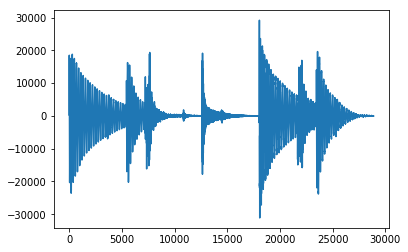

In [30]:
# Setting things up
frate, file = scipy.io.wavfile.read("./80s.wav")

dft_size = 512
hop_size = int(dft_size/4)
zero_pad = 32

IPython.display.display( IPython.display.Audio( file, rate=frate))
plt.plot(file)
Hann_window = np.hanning(dft_size)
Hamming_window = np.hamming(dft_size)
Kaiser_window = np.kaiser(dft_size, 14)
print("Input shape:",file.shape)

In [31]:
# Perform foward stft
stft_output = stft(file, dft_size, hop_size, zero_pad, Hann_window)
output = np.absolute(stft_output)**0.3

Text(0,0.5,'HZ')

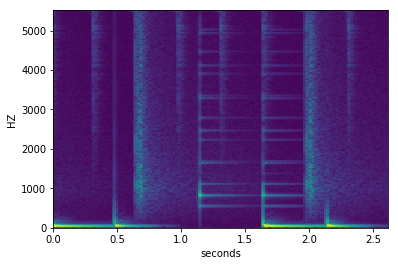

In [32]:
# Change the axis of the plot
X = np.linspace(0, len(file)/frate, len(output))
freq = np.max(fftfreq(len(file), d=1/frate))
Y = np.linspace(0, freq, output.T.shape[0])
plt.pcolormesh(X, Y, output.T)
plt.xlabel("seconds")
plt.ylabel("HZ")

(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,) (544,)
(544,)

C:\Users\Finale\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Finale\Anaconda3\lib\site-packages\IPython\lib\display.py:124: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


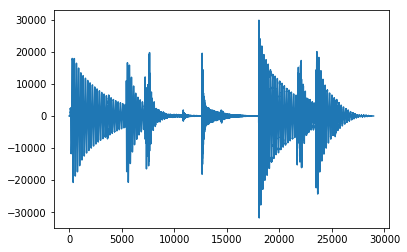

In [33]:
# Perform inverse stft

inverse_output = stft( stft_output, dft_size, hop_size, zero_pad,np.hanning(dft_size+zero_pad))
plt.plot(np.divide(inverse_output, 1.5))
IPython.display.display( IPython.display.Audio( inverse_output, rate=frate))